Mask R-CNN - Inspect Model

In [4]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom_2

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs")

# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "samples\\custom\\dataset")

# Inference Configuration
config = custom_2.CustomInferenceConfig()
# config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
#DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
DEVICE = "/gpu:0" 
# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"

print(ROOT_DIR)
print(LOGS_DIR)
print(DATASET_DIR)

C:\Users\kongs\herlev\gpu_build\test
C:\Users\kongs\herlev\gpu_build\test\logs
C:\Users\kongs\herlev\gpu_build\test\samples\custom\dataset


In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

# Load validation dataset
dataset = custom_2.CustomDataset()
dataset.load_custom(DATASET_DIR, "val")
#dataset.load_custom("C:\\Users\\kongs\\herlev\\gpu_build\\test\\samples\\custom\\dataset", "val")
#C:\Users\kongs\herlev\gpu_build\test\sample\custom\dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)

# Path to a specific weights file
# weights_path = "/path/to/mask_rcnn_nucleus.h5"
weights_path = os.path.join(LOGS_DIR, "custom20201217T2322\\mask_rcnn_custom_0010.h5")
# C:\Users\kongs\herlev\gpu_build\test\logs\custom20201214T0303
# C:\Users\kongs\herlev\gpu_build\test\logs\custom20201217T2322
# custom20201214T2114 - 100 step_epoch 10 epoch

# custom20201214T2227 - 200 step_epoch 10 epoch

# custom20201214T2259 - 300 step_epoch 10 epoch

# custom20201214T2338 - 400 step_epoch 10 epoch

# custom20201215T0034 - 500 step_epoch 10 epoch 

# Or, load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Images: 84
Classes: ['BG', 'carcinoma_in_situ', 'light_dysplastic', 'moderate_dysplastic', 'normal_columnar', 'normal_intermediate', 'normal_superficiel', 'severe_dysplastic']
Loading weights  C:\Users\kongs\herlev\gpu_build\test\logs\custom20201217T2322\mask_rcnn_custom_0010.h5
Re-starting from epoch 10


Here is the ID [4]
image ID: custom.153956040-153956072-003.BMP (58) C:\Users\kongs\herlev\gpu_build\test\samples\custom\dataset\val\153956040-153956072-003.BMP
Original image shape:  [145  91   3]
Processing 1 images
image                    shape: (832, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 832, 512, 3)      min:    0.00000  max:  255.00000  uint8
image_metas              shape: (1, 20)               min:    0.00000  max:  832.00000  float64
anchors                  shape: (1, 106392, 4)        min:   -0.17712  max:    1.05188  float32
gt_class_id              shape: (1,)                  min:    4.00000  max:    4.00000  int32
gt_bbox                  shape: (1, 4)                min:    0.00000  max:  824.00000  int32
gt_mask                  shape: (832, 512, 1)         min:    0.00000  max:    1.00000  uint8
AP @0.50:	 0.000
AP @0.55:	 0.000
AP @0.60:	 0.000
AP @0.65:	 0.000
AP @0.70:	 0.000
AP @0.75:	 0.000
AP @0.80:	 0.000
A

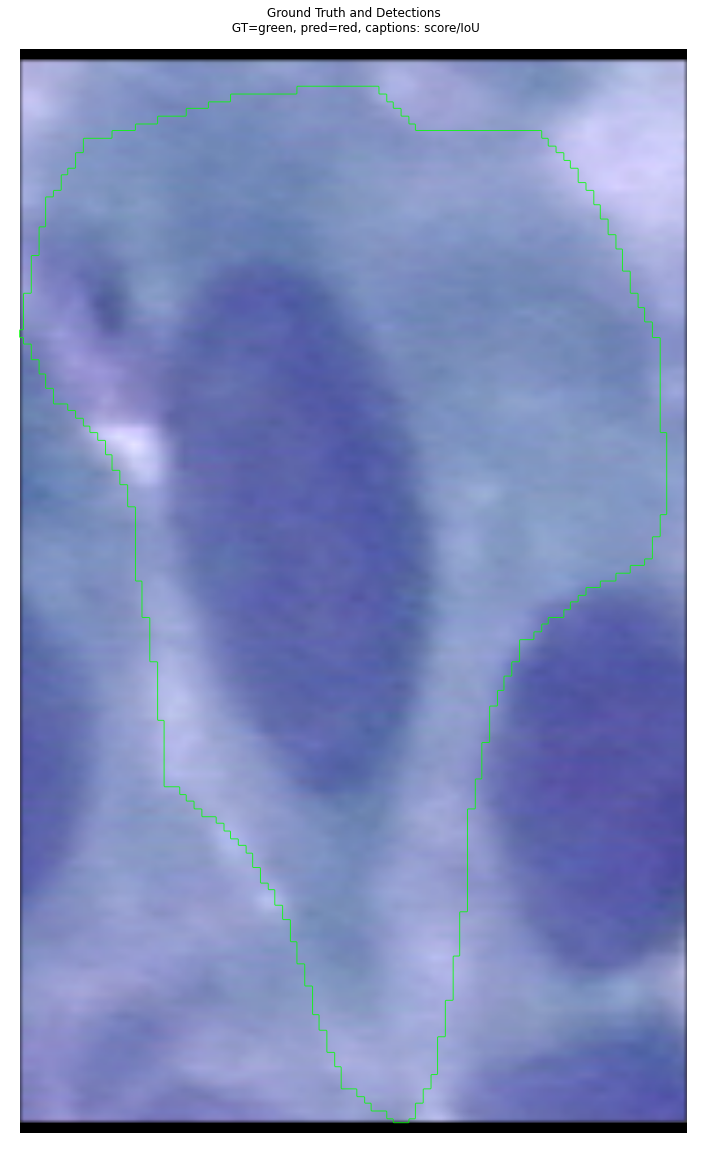

In [6]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])


# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)



*** No instances to display *** 



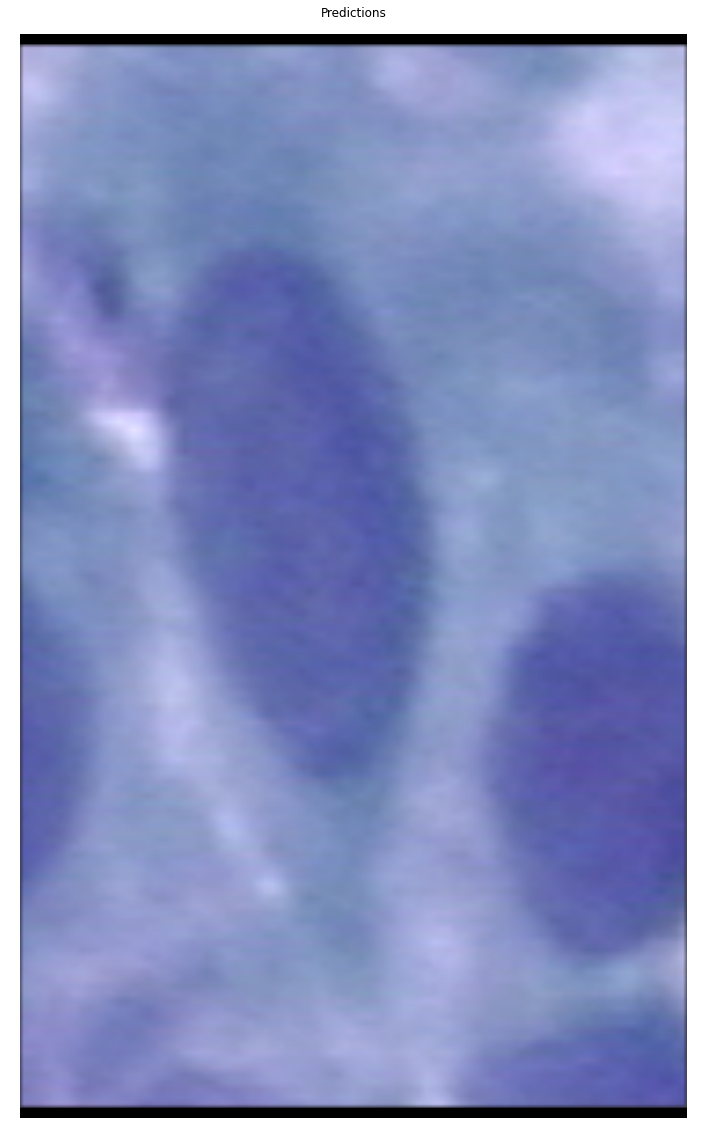

In [7]:
# Display predictions only
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=get_ax(1),
                           show_bbox=False, show_mask=False,
                           title="Predictions")

proposals                shape: (1, 2000, 4)          min:    0.00000  max:    1.00000  float32
probs                    shape: (1, 2000, 8)          min:    0.00000  max:    1.00000  float32
deltas                   shape: (1, 2000, 8, 4)       min:   -4.40438  max:    6.74482  float32
masks                    shape: (1, 400, 28, 28, 8)   min:    0.00091  max:    1.00000  float32
detections               shape: (1, 400, 6)           min:    0.00000  max:    4.00000  float32
4 detections: ['normal_columnar' 'normal_columnar' 'normal_columnar' 'normal_columnar']


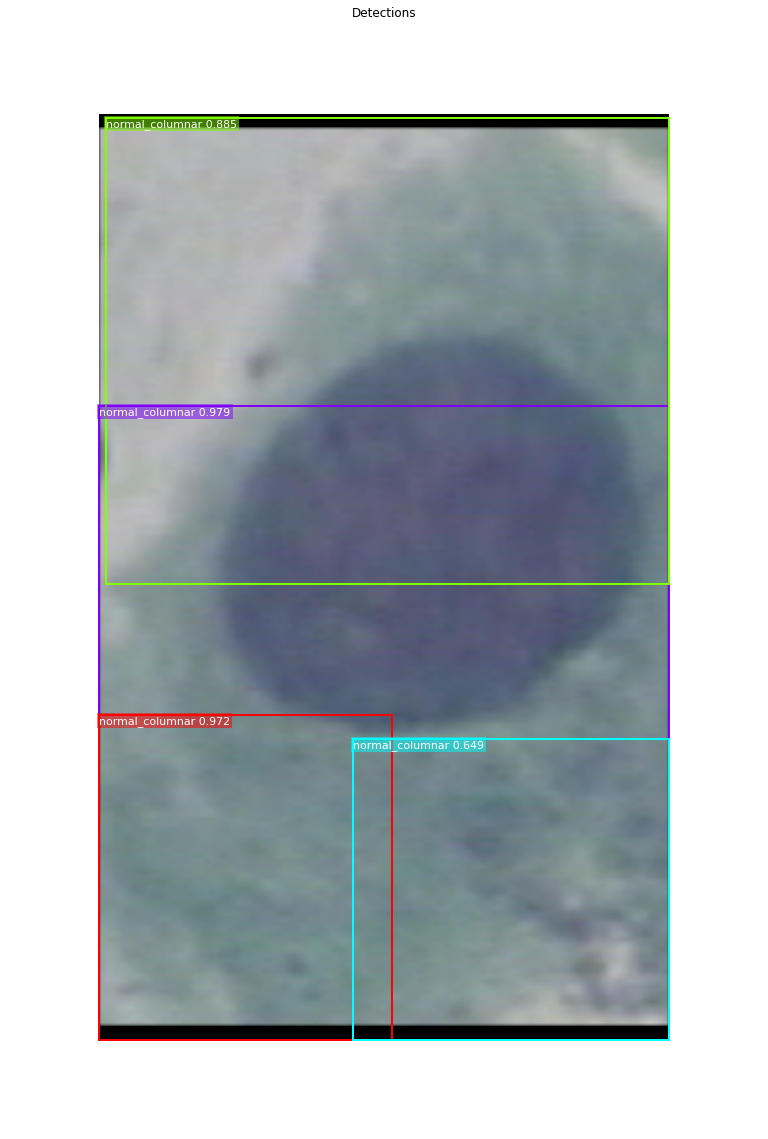

In [9]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())